In [12]:
import json
from colored import Fore, Style
from collections import defaultdict

from matplotlib import pyplot as plt

In [4]:
data = json.load(open('echr_dev.json'))

In [5]:
keys = data[-1].keys()

for key in keys:
    if key == 'text':
        continue
    print(key)
    print(data[0][key])
    print()

annotations
{'annotator1': {'entity_mentions': [{'entity_type': 'CODE', 'entity_mention_id': '001-83927_a1_em1', 'start_offset': 54, 'end_offset': 62, 'span_text': '40593/04', 'edit_type': 'check', 'identifier_type': 'DIRECT', 'entity_id': '001-83927_a1_e1', 'confidential_status': 'NOT_CONFIDENTIAL'}, {'entity_type': 'ORG', 'entity_mention_id': '001-83927_a1_em2', 'start_offset': 76, 'end_offset': 94, 'span_text': 'Republic of Turkey', 'edit_type': 'insert', 'confidential_status': 'NOT_CONFIDENTIAL', 'identifier_type': 'NO_MASK', 'entity_id': '001-83927_a1_e2'}, {'entity_type': 'DEM', 'entity_mention_id': '001-83927_a1_em3', 'start_offset': 236, 'end_offset': 243, 'span_text': 'Turkish', 'edit_type': 'check', 'confidential_status': 'NOT_CONFIDENTIAL', 'identifier_type': 'NO_MASK', 'entity_id': '001-83927_a1_e3'}, {'entity_type': 'PERSON', 'entity_mention_id': '001-83927_a1_em4', 'start_offset': 254, 'end_offset': 269, 'span_text': 'Mr Cengiz Polat', 'edit_type': 'check', 'identifier_ty

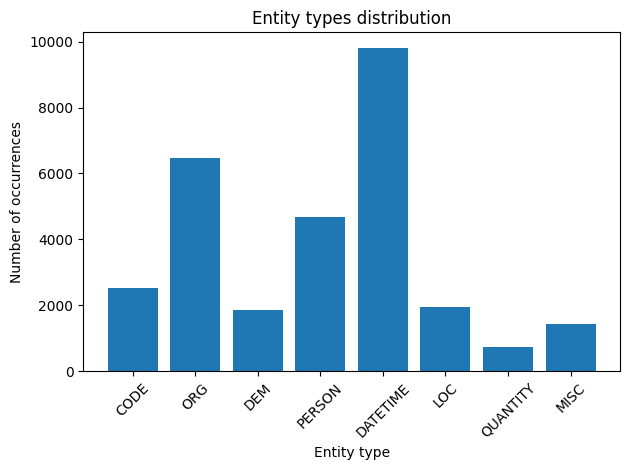

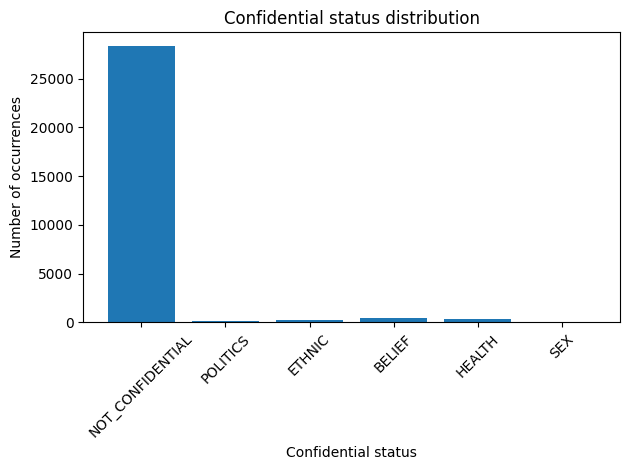

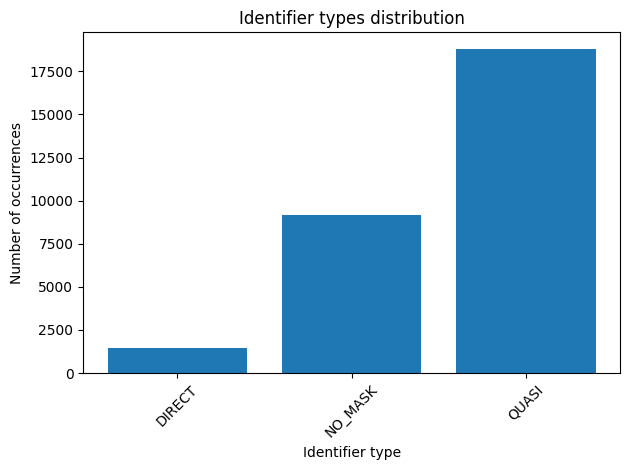

In [22]:
entity_types = defaultdict(int)
confidential_status = defaultdict(int)
identifier_types = defaultdict(int)

for i in range(len(data)):
    #annotator = list(data[i]["annotations"].keys())[-1]
    for annotator in data[i]["annotations"]:
        for entity in data[i]["annotations"][annotator]["entity_mentions"]:
            entity_types[entity["entity_type"]] += 1
            confidential_status[entity["confidential_status"]] += 1
            identifier_types[entity["identifier_type"]] += 1

# plot the entity types distribution and format it nicely
plt.bar(entity_types.keys(), entity_types.values())
plt.xticks(rotation=45)
plt.title('Entity types distribution')
plt.xlabel('Entity type')
plt.ylabel('Number of occurrences')
plt.tight_layout()
plt.show()

# plot the confidential status distribution and format it nicely
plt.bar(confidential_status.keys(), confidential_status.values())
plt.xticks(rotation=45)
plt.title('Confidential status distribution')
plt.xlabel('Confidential status')
plt.ylabel('Number of occurrences')
plt.tight_layout()
plt.show()

# plot the identifier types distribution and format it nicely
plt.bar(identifier_types.keys(), identifier_types.values())
plt.xticks(rotation=45)
plt.title('Identifier types distribution')
plt.xlabel('Identifier type')
plt.ylabel('Number of occurrences')
plt.tight_layout()
plt.show()

In [10]:
print(data[0]["annotations"]["annotator10"]["entity_mentions"])

[{'entity_type': 'CODE', 'entity_mention_id': '001-83927_a10_em1', 'start_offset': 54, 'end_offset': 62, 'span_text': '40593/04', 'edit_type': 'insert', 'identifier_type': 'DIRECT', 'entity_id': '001-83927_a10_e1', 'confidential_status': 'NOT_CONFIDENTIAL'}, {'entity_type': 'ORG', 'entity_mention_id': '001-83927_a10_em2', 'start_offset': 76, 'end_offset': 94, 'span_text': 'Republic of Turkey', 'edit_type': 'insert', 'identifier_type': 'NO_MASK', 'confidential_status': 'NOT_CONFIDENTIAL', 'related_mentions': [], 'entity_id': '001-83927_a10_e2'}, {'entity_type': 'DEM', 'entity_mention_id': '001-83927_a10_em3', 'start_offset': 236, 'end_offset': 243, 'span_text': 'Turkish', 'edit_type': 'check', 'confidential_status': 'NOT_CONFIDENTIAL', 'identifier_type': 'NO_MASK', 'entity_id': '001-83927_a10_e3'}, {'entity_type': 'PERSON', 'entity_mention_id': '001-83927_a10_em4', 'start_offset': 254, 'end_offset': 269, 'span_text': 'Mr Cengiz Polat', 'edit_type': 'check', 'identifier_type': 'DIRECT', 

In [6]:
from colorama import Fore, Style


text = data[0]['text']
annotations = data[0]['annotations']["annotator10"]["entity_mentions"]

# Sort annotations in reverse order by start_offset
annotations_sorted = sorted(annotations, key=lambda x: x['start_offset'], reverse=True)

for annotation in annotations_sorted:
    if annotation['identifier_type'] != 'NO_MASK':
        start = annotation['start_offset']
        end = annotation['end_offset']
        text = text[:start] + Fore.RED + text[start:end] + Style.RESET_ALL + text[end:]

# Now, text modifications don't displace subsequent annotations' offsets.
print(text)

PROCEDURE

The case originated in an application (no. 40593/04) against the Republic of Turkey lodged with the Court under Article 34 of the Convention for the Protection of Human Rights and Fundamental Freedoms (“the Convention”) by a Turkish national, Mr Cengiz Polat (“the applicant”), on 15 October 2004.

The applicant was represented by Mr E. Kanar, a lawyer practising in Istanbul. The Turkish Government (“the Government”) did not designate an Agent for the purposes of the proceedings before the Court.

On 6 November 2006 the Court decided to give notice of the application to the Government. Applying Article 29 § 3 of the Convention, it decided to rule on the admissibility and merits of the application at the same time.

THE FACTS

THE CIRCUMSTANCES OF THE CASE

The applicant was born in 1965. He is currently detained in the Edirne F-type Prison.

On 6 February 1993 the applicant was arrested and placed in police custody by officers from the Anti-terror branch of the Istanbul Secur

In [6]:
from colorama import Fore, Style

# Assuming we're working with the first item in `data`
text = data[0]['text']
annotations = []

# Aggregate annotations from all annotators
for annotator, info in data[0]['annotations'].items():
    for mention in info['entity_mentions']:
        if mention['identifier_type'] != 'NO_MASK':
            annotations.append(mention)

# Sort annotations by start_offset in reverse order to avoid offset issues
annotations_sorted = sorted(annotations, key=lambda x: x['start_offset'], reverse=True)

# Apply coloring
for annotation in annotations_sorted:
    start = annotation['start_offset']
    end = annotation['end_offset']
    text = text[:start] + Fore.RED + text[start:end] + Style.RESET_ALL + text[end:]

print(text)


PROCEDURE

The case originated in an application (no. 40593/04) against the Republic of Turkey lodged with the Court under Article 34 of the Convention for the Protection of Human Rights and Fundamental Freedoms (“the Convention”) by a Turkish national, Mr Cengiz Polat (“the applicant”), on 15 October 2004.

The applicant was represented by Mr E. Kanar, a lawyer practising in Istanbul. The Turkish Government (“the Government”) did not designate an Agent for the purposes of the proceedings before the Court.

On 6 November 2006 the Court decided to give notice of the application to the Government. Applying Article 29 § 3 of the Convention, it decided to rule on the admissibility and merits of the application at the same time.

THE FACTS

THE CIRCUMSTANCES OF THE CASE

The applicant was born in [31m1965. He is currently detained in the Edirne F-type Prison.

On 6 February 1993 the applicant was arrested and placed in police custody by officers from the Anti-terror branch of the Istanbul 